# Data Mining Projekt

Projekt von Magnus Jachnik im Rahmen der Vorlesung DDMI von Prof. Schicker WiSe2023/24.
Im folgenden Projekt sollen Fettleibigkeitsklassen in Abhängigkeit von Gewohnheiten von Menschen in Südamerika dargestellt und anhand verschiedener Methoden vorhergesagt werden.



### Einbinden von Bibliotheken

In [58]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import phik
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### Einlesen des Datensatzes

In [59]:
# Dateipfad zum Datensatz
dataset_csv = "ObesityDataSet_raw_and_data_sinthetic.csv"

# Einlesen der Datei in ein DataFrame
df= pd.read_csv(dataset_csv)

# Ausgeben der ersten fünf Einträge 
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

### Daten, die keine Gewohnheiten sind, werden aus dem DataFrame entfernt

In [60]:
# Löschen bestimmter Spalten 
df.drop(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight'], axis=1, inplace = True)

# Ausgeben der ersten fünf Einträge
print(df.head())

  FAVC  FCVC  NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0   no   2.0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1   no   3.0  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2   no   2.0  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3   no   3.0  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4   no   2.0  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II  


### Für eine bessere Lesbarkeit werden die meisten Spalten umbenannt

In [61]:
# Erstellen eines Dictionarys mit den Umbenennungen
column_mapping = {'FAVC': 'frequent_consumption_high_caloric_food', 'FCVC': 'frequency_consumption_vegetables', 'NCP':'number_of_main_meals', 'CAEC': 'consumption_food_between_meals', 'CH2O': 'consumption_water_daily', 'CALC': 'consumption_of_alcohol', 'SCC':'calories_consumption_monitoring', 'FAF': 'physical_activity_frequency', 'TUE': 'time_using_technology_devices', 'MTRANS': 'transportation_used', 'NObeyesdad':'obesity_levels'}

# Umbenennen der Spalten
df_rename=df
df_rename.rename(columns=column_mapping, inplace=True)

# Ausgeben der ersten fünf Einträge
print(df_rename.head())

  frequent_consumption_high_caloric_food  frequency_consumption_vegetables  \
0                                     no                               2.0   
1                                     no                               3.0   
2                                     no                               2.0   
3                                     no                               3.0   
4                                     no                               2.0   

   number_of_main_meals consumption_food_between_meals SMOKE  \
0                   3.0                      Sometimes    no   
1                   3.0                      Sometimes   yes   
2                   3.0                      Sometimes    no   
3                   3.0                      Sometimes    no   
4                   1.0                      Sometimes    no   

   consumption_water_daily calories_consumption_monitoring  \
0                      2.0                              no   
1                     

### Um einen Überblick über den Datensatz zu bekommen wird für jede Spalte ein Balkendiagramm, das die Häufigkeit der einzelnen Werte anzeigt, erstellt.

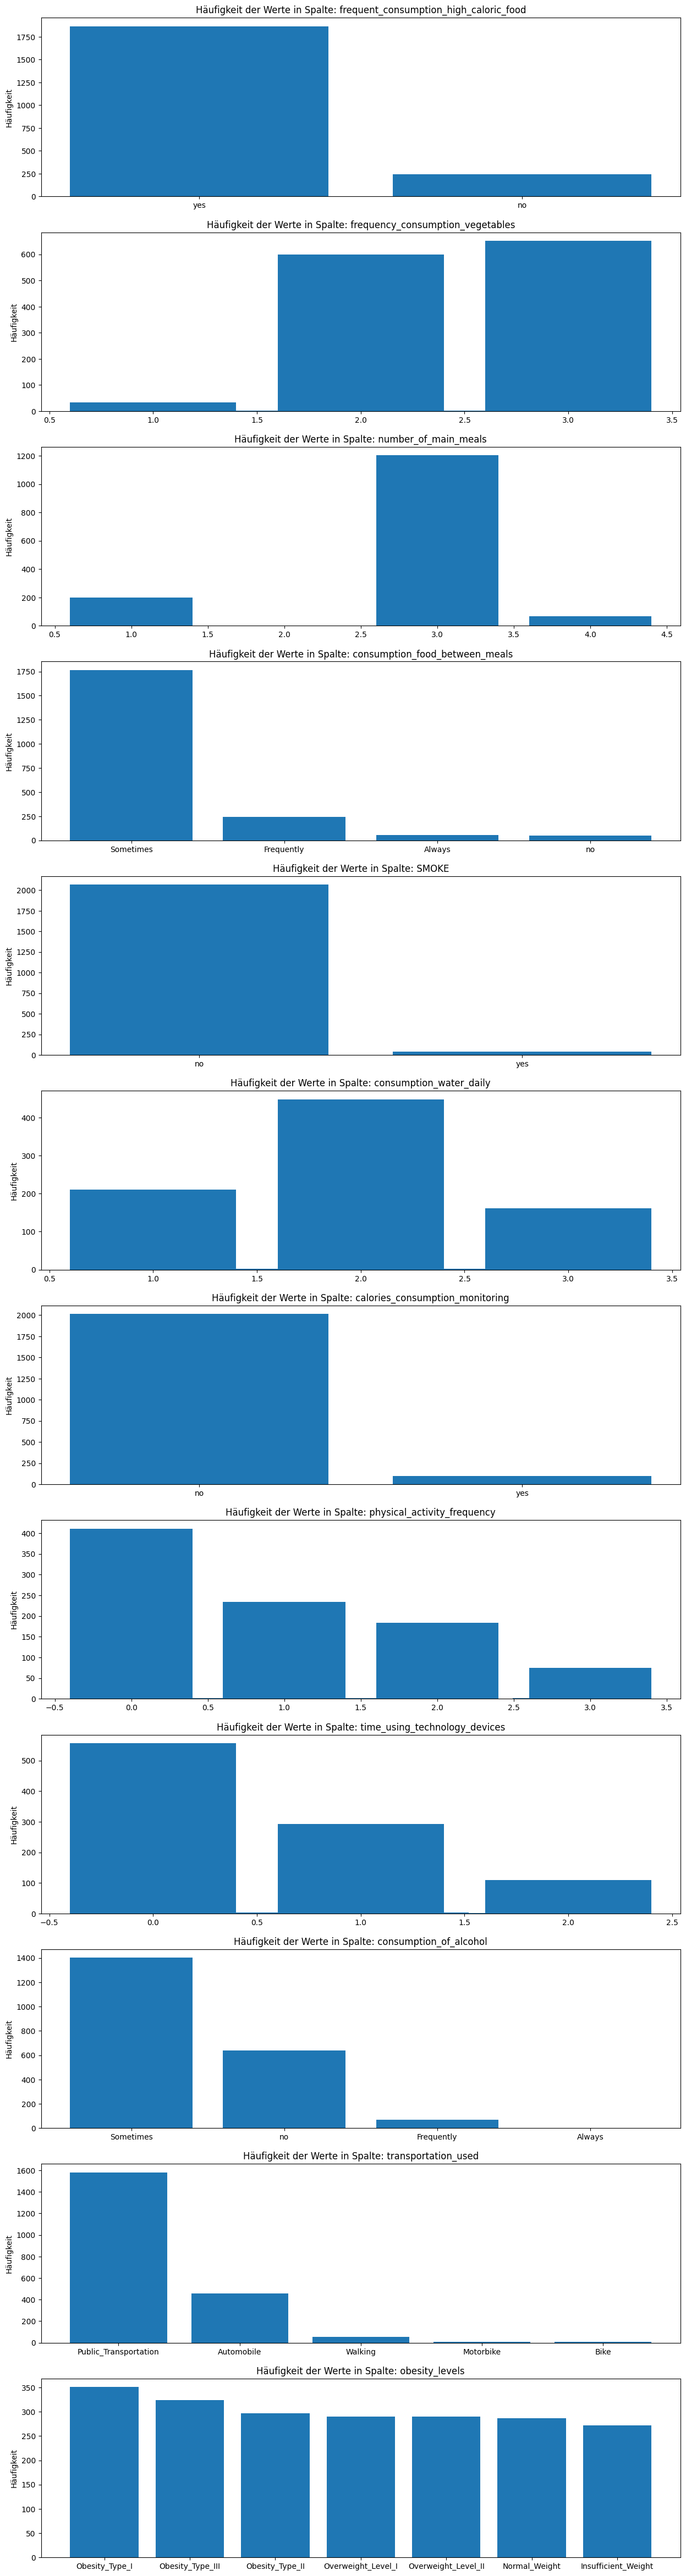

In [62]:
# Erstellen eines subplots für jede Spalte
fig, axs = plt.subplots(nrows=len(df_rename.columns), ncols=1, figsize=(15, 60))

# Iterieren über jede Spalte und Erstellen des Balkendiagramms
for i, column in enumerate(df_rename.columns):
    # Zählen der Häufigkeiten der Werte der aktuellen Spalte
    value_counts = df_rename[column].value_counts()

    # Erstellen des Diagramms für die aktuellen Spalte
    axs[i].bar(value_counts.index, value_counts.values)

    # Beschriften des Balkendiagramms
    axs[i].set_ylabel('Häufigkeit')
    axs[i].set_title(f'Häufigkeit der Werte in Spalte: {column}')

# Anzeigen der Diagramme
plt.show()

### Dem Balkendiagramm ist zu entnehmen, dass manche Inhalte des Datensatzes transformiert werden müssen.

In [63]:
# Float Werte bestimmter Zeilen in int umwandeln 
df_rename['frequency_consumption_vegetables'] = df_rename['frequency_consumption_vegetables'].astype(int)
df_rename['consumption_water_daily'] = df_rename['consumption_water_daily'].astype(int)
df_rename['physical_activity_frequency'] = df_rename['physical_activity_frequency'].astype(int)
df_rename['time_using_technology_devices'] = df_rename['time_using_technology_devices'].astype(int)
df_rename['number_of_main_meals'] = df_rename['number_of_main_meals'].astype(int)

# Ersetzen der int Werte durch Antwortmöglichkeit, die dem int Wert entspricht
df_rename['frequency_consumption_vegetables'] = df_rename['frequency_consumption_vegetables'].astype(str).str.strip().replace({"1": "Never", "2": "Sometimes", "3": "Always"})
df_rename['number_of_main_meals'] = df_rename['number_of_main_meals'].astype(str).str.strip().replace({"1": "Between 1 and 2", "2": "Between 1 and 2", "3": "Three", "4": "More than three"}) 
df_rename['consumption_water_daily'] = df_rename['consumption_water_daily'].astype(str).str.strip().replace({"1": "Less than a liter", "2": "Between 1 and 2L", "3": "More than 2L"})
df_rename['physical_activity_frequency'] = df_rename['physical_activity_frequency'].astype(str).str.strip().replace({"0": "I do not have", "1": "1 or 2 days", "2": "2 or 4 days", "3": "4 or 5 days"})
df_rename['time_using_technology_devices'] = df_rename['time_using_technology_devices'].astype(str).str.strip().replace({"0": "0-2 hours", "1": "3-5 hours", "2": "More than 5 hours"})

### Mit den transformierten Daten ergibt sich folgendes Balkendiagramm mit korrekten Werten

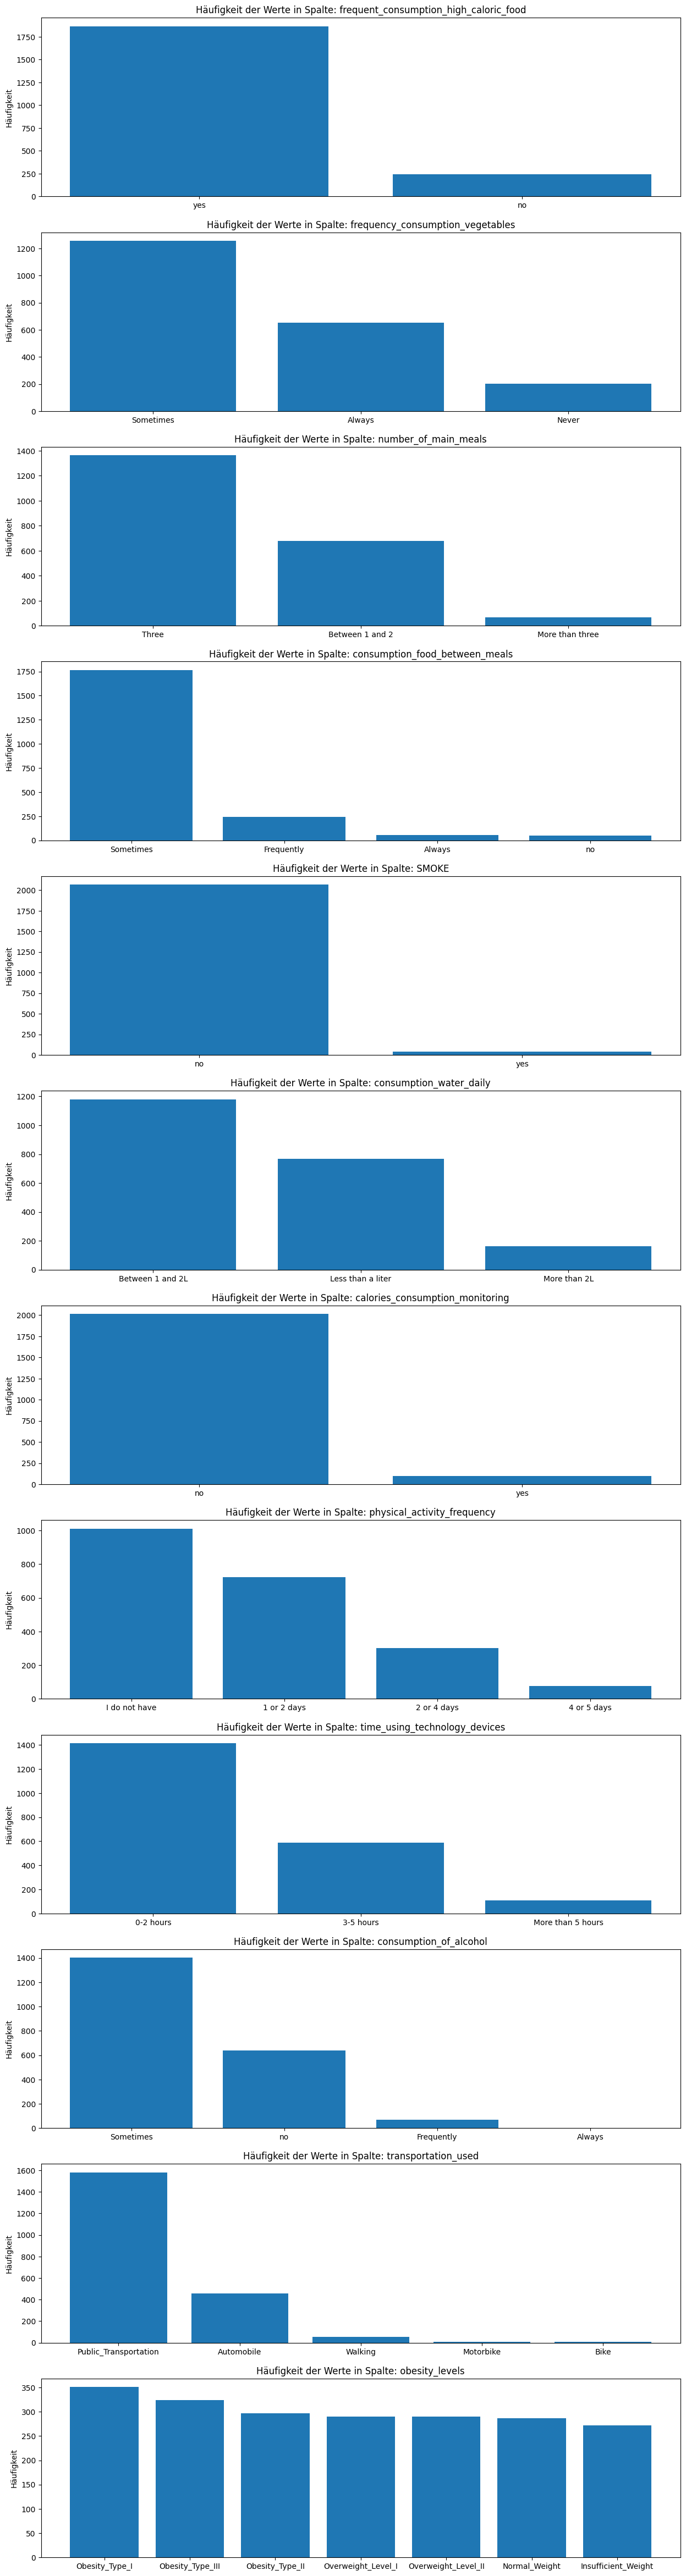

In [64]:
# Erstellen eines subplots für jede Spalte
fig, axs = plt.subplots(nrows=len(df_rename.columns), ncols=1, figsize=(15, 60))

# Iterieren über jede Spalte und Erstellen des Balkendiagramms
for i, column in enumerate(df_rename.columns):
    # Zählen der Häufigkeiten der Werte der aktuellen Spalte
    value_counts = df_rename[column].value_counts()

    # Erstellen des Diagramms für die aktuellen Spalte
    axs[i].bar(value_counts.index, value_counts.values)

    # Beschriften des Balkendiagramms
    axs[i].set_ylabel('Häufigkeit')
    axs[i].set_title(f'Häufigkeit der Werte in Spalte: {column}')

# Anzeigen der Diagramme
plt.show()

### Phi-Koeffizienten werden bezogen auf die obesity_levels berechnet. Dafür wird das ursprüngliche DataFrame in einem ersten Schritt in ein DataFrame mit binären Werten umgewandelt.

In [65]:
# One-Hot-Encoding -> Umwandlung in DataFrame mit Binären Werten
df_encoded = pd.get_dummies(df_rename, prefix=None)

# Ausgeben der ersten Werte
print(df_encoded.head())

   frequent_consumption_high_caloric_food_no  \
0                                       True   
1                                       True   
2                                       True   
3                                       True   
4                                       True   

   frequent_consumption_high_caloric_food_yes  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   frequency_consumption_vegetables_Always  \
0                                    False   
1                                     True   
2                                    False   
3                                     True   
4                                    False   

   frequency_consumption_vegetables_Never  \
0                                   False   
1                                   False   
2   

In [66]:

def phi_coefficient(df_encoded, target_variable):

    # Berechnen der Phi-Koeffizienten Matrix
    phi_matrix = df_encoded.phik_matrix()

    # Abspeichern der Phi-Koeffizienten, die auf die Zielvariable bezogen sind
    phi_coefficients = phi_matrix[target_variable].drop(target_variable)

    # Aufsteigende Sortierung der Phi-Koeffizienten
    sorted_phi_coefficients = phi_coefficients.sort_values(ascending=False)
    
    # Ausgeben der Phi-Koeffizienten
    print('\n' "Phi-Koeffizienten, die sich auf {} beziehen:".format(target_variable))
    print(sorted_phi_coefficients)

phi_coefficient(df_encoded, target_variable='obesity_levels_Obesity_Type_III')
phi_coefficient(df_encoded, target_variable='obesity_levels_Obesity_Type_II')
phi_coefficient(df_encoded, target_variable='obesity_levels_Obesity_Type_I')
phi_coefficient(df_encoded, target_variable='obesity_levels_Overweight_Level_I')
phi_coefficient(df_encoded, target_variable='obesity_levels_Overweight_Level_II')
phi_coefficient(df_encoded, target_variable='obesity_levels_Normal_Weight')
phi_coefficient(df_encoded, target_variable='obesity_levels_Insufficient_Weight')


Phi-Koeffizienten, die sich auf obesity_levels_Obesity_Type_III beziehen:
frequency_consumption_vegetables_Always            0.840365
frequency_consumption_vegetables_Sometimes         0.723481
number_of_main_meals_Three                         0.473074
consumption_of_alcohol_Sometimes                   0.451509
number_of_main_meals_Between 1 and 2               0.441882
consumption_of_alcohol_no                          0.419322
time_using_technology_devices_0-2 hours            0.401254
transportation_used_Public_Transportation          0.370144
time_using_technology_devices_3-5 hours            0.348491
transportation_used_Automobile                     0.335784
obesity_levels_Obesity_Type_I                      0.289794
consumption_food_between_meals_Sometimes           0.281930
obesity_levels_Obesity_Type_II                     0.262431
obesity_levels_Overweight_Level_II                 0.258776
obesity_levels_Overweight_Level_I                  0.258776
physical_activity_frequen

### Supervised Learning mit einem Entscheidungsbaum. Zuerst wird der Datensatz transformiert, sodass die das Modell damit arbeiten kann.

In [67]:
column_to_exclude = 'obesity_levels'

# One-Hot-Encoding für alle Spalten außer der ausgewählten Spalte
df_supervised_learning = pd.get_dummies(df.drop(column_to_exclude, axis=1))

# Füge die nicht codierte Spalte wieder hinzu
df_supervised_learning[column_to_exclude] = df[column_to_exclude]

print(df_supervised_learning.head())

   frequent_consumption_high_caloric_food_no  \
0                                       True   
1                                       True   
2                                       True   
3                                       True   
4                                       True   

   frequent_consumption_high_caloric_food_yes  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   frequency_consumption_vegetables_Always  \
0                                    False   
1                                     True   
2                                    False   
3                                     True   
4                                    False   

   frequency_consumption_vegetables_Never  \
0                                   False   
1                                   False   
2   

In [68]:
# obesity_levels ist die Zielvariable
features = df_supervised_learning.drop('obesity_levels', axis=1)
labels = df_supervised_learning['obesity_levels']

# Einteilung in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Entscheidungsbaum-Modell mit Standardwerten für Parameter erstellen
model_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_dt.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
predictions = model_dt.predict(X_test)

# Evaluierung der Modellgenauigkeit
accuracy = accuracy_score(y_test, predictions)
print("Genauigkeit des Entscheidungsbaums:", accuracy)

Genauigkeit des Entscheidungsbaums: 0.6501182033096927


### Random Forest

In [69]:
# Random Forest-Modell erstellen
model_rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1)
model_rf.fit(X_train, y_train)

# Vorhersagen auf den Testdaten für Random Forest
predictions_rf = model_rf.predict(X_test)

# Evaluierung der Modellgenauigkeit für Random Forest
accuracy_rf = accuracy_score(y_test, predictions_rf)
print("Genauigkeit des Random Forest-Modells:", accuracy_rf)

Genauigkeit des Random Forest-Modells: 0.6808510638297872


### Das Verändern der Hyperparameter soll die Genauigkeit erhöhen und Overfitting vermeiden

In [70]:
# Entscheidungsbaum-Modell mit angepassten Parametern erstellen
model_dt_adjusted = DecisionTreeClassifier(max_depth=25, min_samples_split=2, min_samples_leaf=1)
model_dt_adjusted.fit(X_train, y_train)

# Vorhersagen auf den Testdaten
predictions_dt_adjusted = model_dt_adjusted.predict(X_test)

# Evaluierung der Modellgenauigkeit
accuracy_dt_adjusted = accuracy_score(y_test, predictions_dt_adjusted)
print("Genauigkeit des verbesserten Entscheidungsbaum-Modells:", accuracy_dt_adjusted)

# Random Forest-Modell mit angepassten Parametern erstellen
model_rf_adjusted = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_split=6, min_samples_leaf=2)
model_rf_adjusted.fit(X_train, y_train)

# Vorhersagen auf den Testdaten für Random Forest
predictions_rf_adjusted = model_rf_adjusted.predict(X_test)

# Evaluierung der Modellgenauigkeit für Random Forest
accuracy_rf_adjusted = accuracy_score(y_test, predictions_rf_adjusted)
print("Genauigkeit des verbesserten Random Forest-Modells:", accuracy_rf_adjusted)

Genauigkeit des verbesserten Entscheidungsbaum-Modells: 0.6524822695035462
Genauigkeit des verbesserten Random Forest-Modells: 0.6690307328605201


### Eine feature Selection soll helfen die Genauigkeit zu verbessern und Overfitting zu vermeiden

In [71]:
# Entscheidungsbaum-Modell erstellen
model_feature_selection = DecisionTreeClassifier()
model_feature_selection.fit(X_train, y_train)

# Feature Importance extrahieren
feature_importance = model_feature_selection.feature_importances_

# Einfluss der Merkmale ausgeben, absteigend sortiert
sorted_feature_importance = np.argsort(feature_importance)[::-1]
sorted_features = features.columns[sorted_feature_importance]

print("Feature Importance anhand eines Entscheidungsbaums (absteigend sortiert):")
print(dict(zip(sorted_features, sorted(feature_importance, reverse=True))))

Feature Importance anhand eines Entscheidungsbaums (absteigend sortiert):
{'frequency_consumption_vegetables_Always': 0.10990209242355067, 'consumption_of_alcohol_Sometimes': 0.05761892988370723, 'transportation_used_Public_Transportation': 0.05678504182854574, 'time_using_technology_devices_0-2 hours': 0.054740975826747654, 'consumption_food_between_meals_Sometimes': 0.054626466246815795, 'number_of_main_meals_Between 1 and 2': 0.05198224950956954, 'transportation_used_Automobile': 0.049654902822773794, 'consumption_water_daily_Less than a liter': 0.04809147920244236, 'physical_activity_frequency_1 or 2 days': 0.037258724229949115, 'consumption_of_alcohol_no': 0.036870509545123636, 'consumption_food_between_meals_Frequently': 0.036302435506170364, 'frequent_consumption_high_caloric_food_yes': 0.03487998901994163, 'physical_activity_frequency_I do not have': 0.0347791982963149, 'physical_activity_frequency_2 or 4 days': 0.03307551895664485, 'time_using_technology_devices_3-5 hours': 0.

In [72]:
# Die wichtigsten 9 Spalten werden in ein neues DataFrame gespeichert
selected_columns = [
    'frequency_consumption_vegetables_Always',
    'time_using_technology_devices_0-2 hours',
    'consumption_of_alcohol_Sometimes',
    'consumption_food_between_meals_Sometimes',
    'transportation_used_Automobile',
    'transportation_used_Public_Transportation',
    'number_of_main_meals_Three',
    'consumption_water_daily_Less than a liter',
    'physical_activity_frequency_I do not have',
    'obesity_levels'
]

# Neuen DataFrame nur mit den ausgewählten Spalten erstellen
df_selected_columns = df_supervised_learning[selected_columns]

Genauigkeit des verbesserten Entscheidungsbaum-Modells mit ausgewählten features: 0.5626477541371159
Genauigkeit des verbesserten Random Forest-Modells mit ausgewählten features: 0.5555555555555556


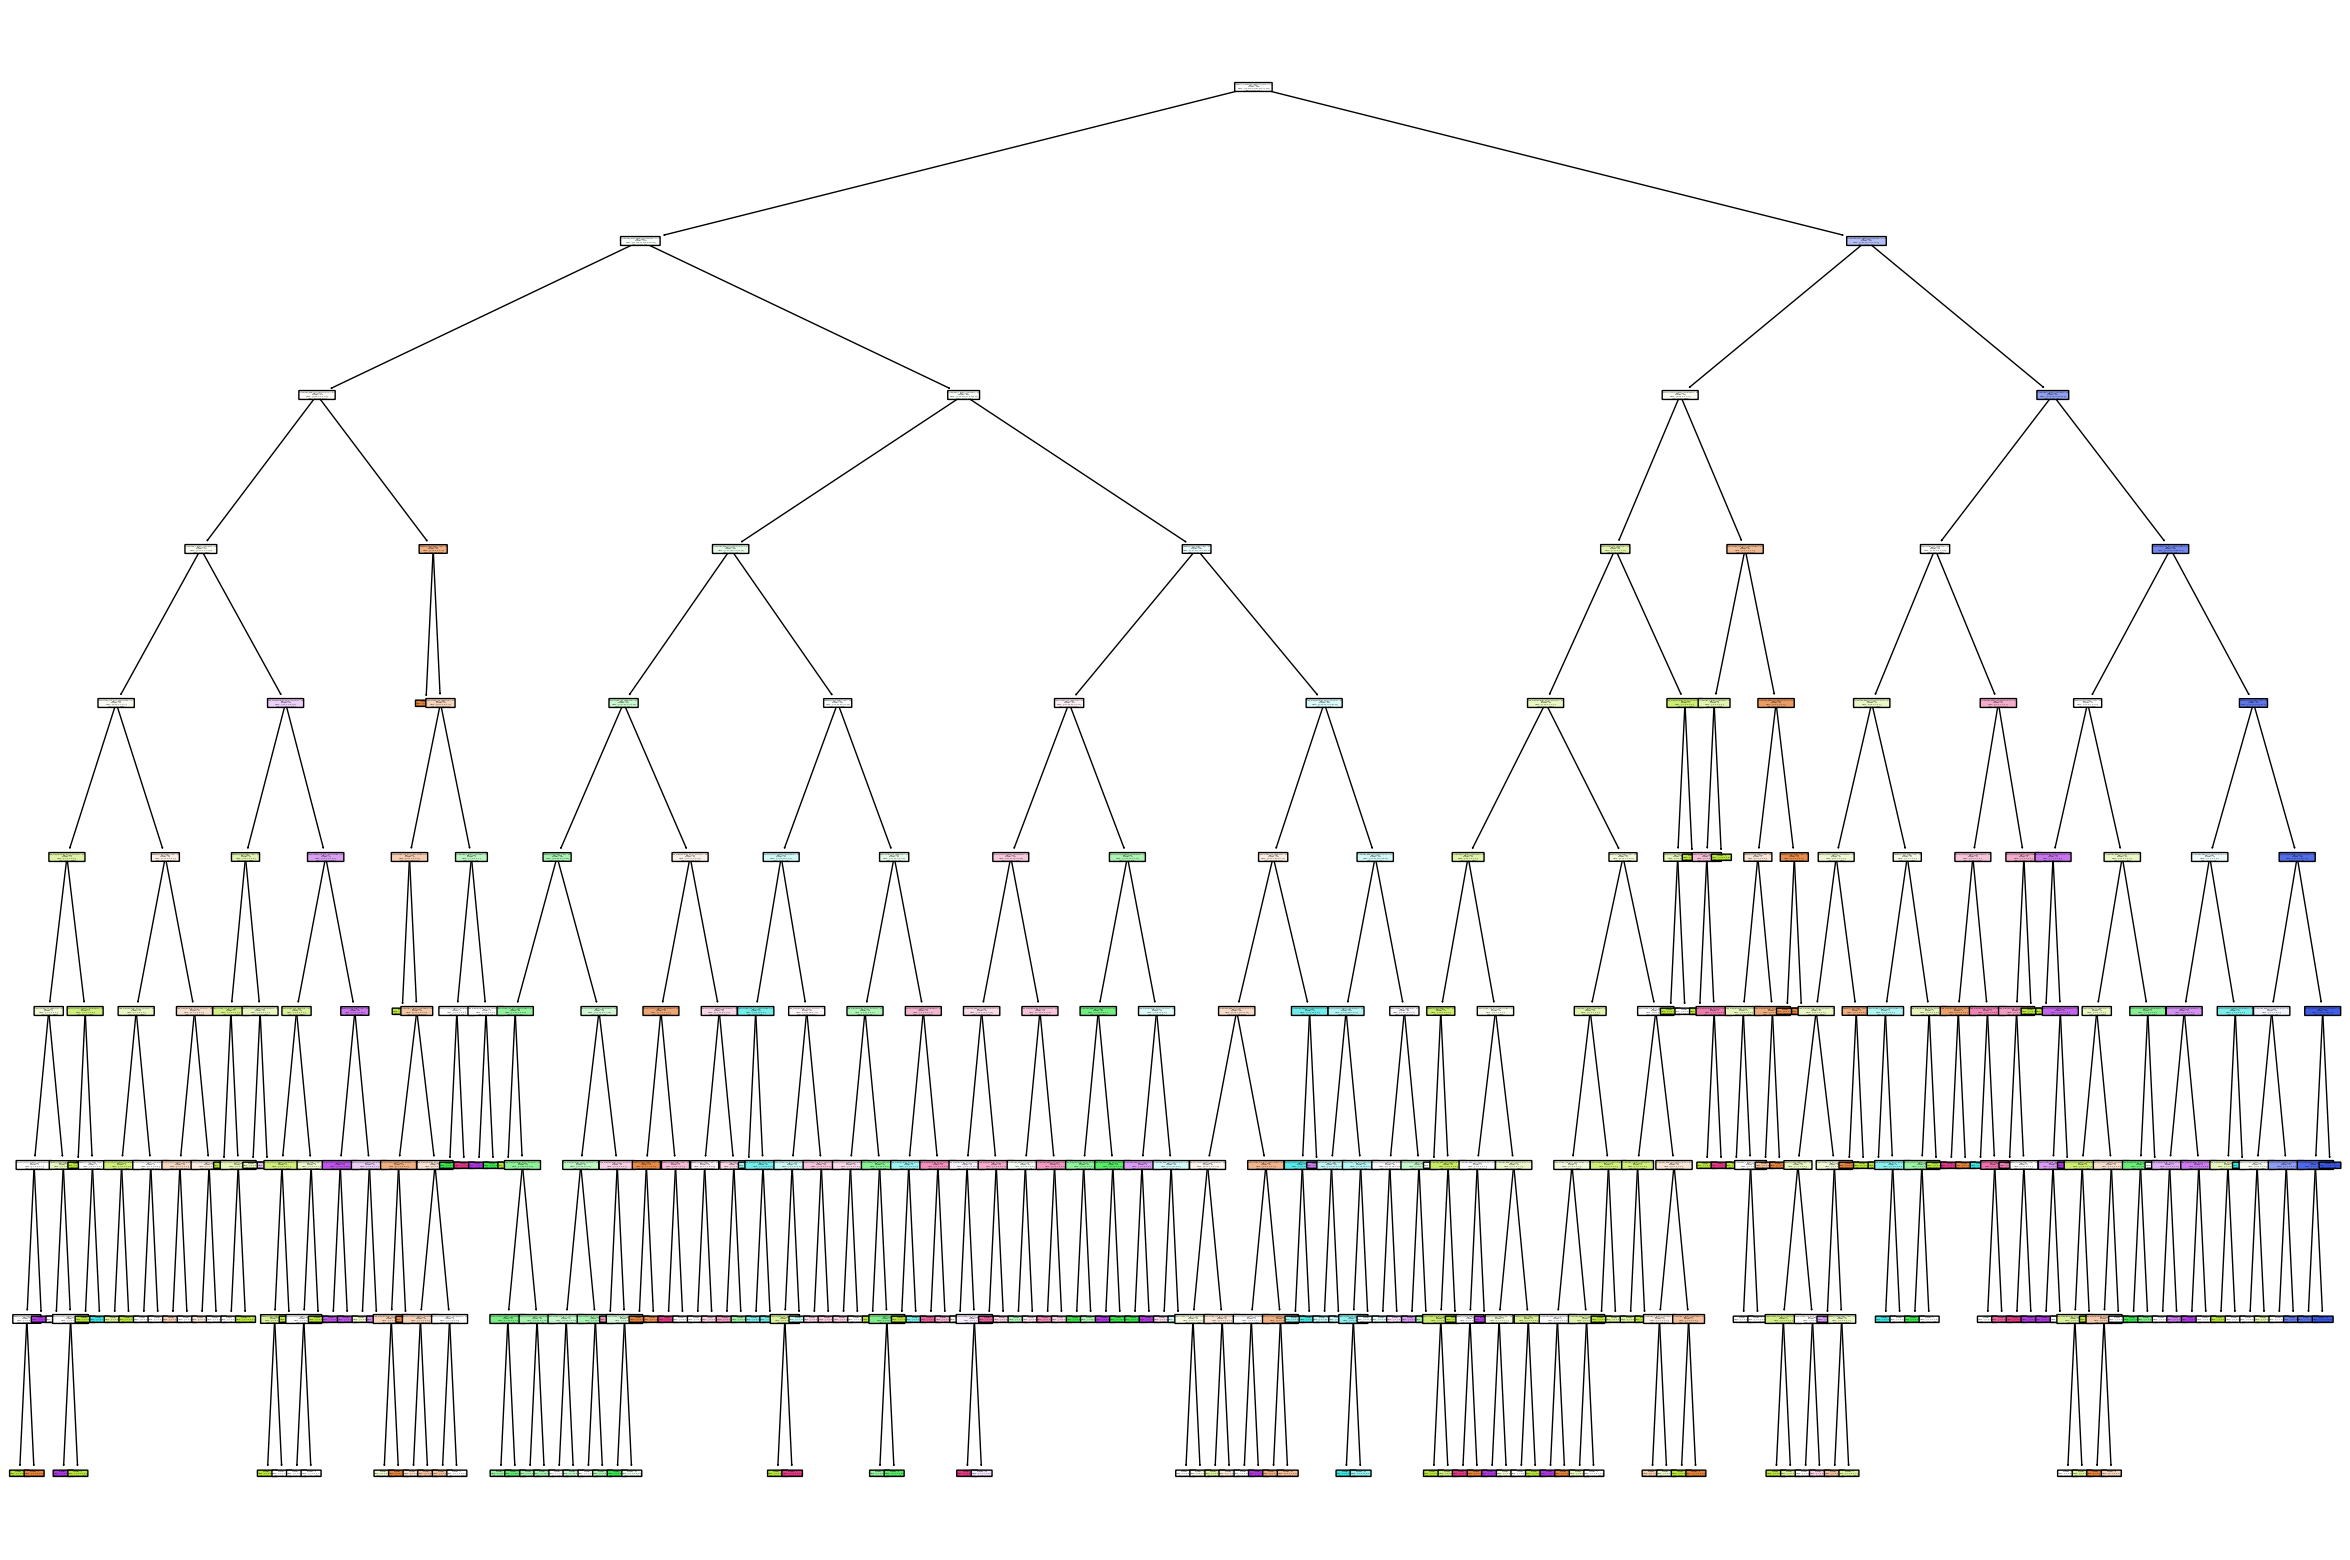

In [73]:
# features und labels definieren
features_selected = df_selected_columns.drop('obesity_levels', axis=1)
labels_selected = df_selected_columns['obesity_levels']

# Einteilung in Trainings- und Testdaten
X_train_features_selected, X_test_features_selected, y_train_features_selected, y_test_features_selected = train_test_split(features_selected, labels_selected, test_size=0.2, random_state=42)

# Entscheidungsbaum-Modell mit angepassten Parametern erstellen
model_dt_features_selected = DecisionTreeClassifier(max_depth=25, min_samples_split=2, min_samples_leaf=1)
model_dt_features_selected.fit(X_train_features_selected, y_train_features_selected)

# Vorhersagen auf den Testdaten
predictions_dt_features_selected = model_dt_features_selected.predict(X_test_features_selected)

# Evaluierung der Modellgenauigkeit
accuracy_dt_features_selected = accuracy_score(y_test_features_selected, predictions_dt_features_selected)
print("Genauigkeit des verbesserten Entscheidungsbaum-Modells mit ausgewählten features:", accuracy_dt_features_selected)

# Random Forest-Modell mit angepassten Parametern erstellen
model_rf_features_selected = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_split=6, min_samples_leaf=2)
model_rf_features_selected.fit(X_train_features_selected, y_train_features_selected)

# Vorhersagen auf den Testdaten für Random Forest
predictions_rf_features_selected = model_rf_features_selected.predict(X_test_features_selected)

# Evaluierung der Modellgenauigkeit für Random Forest
accuracy_rf_features_selected = accuracy_score(y_test_features_selected, predictions_rf_features_selected)
print("Genauigkeit des verbesserten Random Forest-Modells mit ausgewählten features:", accuracy_rf_features_selected)


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot des Entscheidungsbaums
plt.figure(figsize=(30, 20))
plot_tree(model_dt_features_selected, feature_names=features_selected.columns, class_names=model_dt_features_selected.classes_, filled=True, rounded=True)
plt.show()


### Die besten Modelle werden mit verschiedenen Zufallszahlen auf Stabilität getestet

In [74]:
def stability_test(new_random_state):
    # Einteilung in Trainings- und Testdaten für Entscheidungsbaum
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features, labels, test_size=0.2, random_state=new_random_state)

    # Trainieren der besten Modelle mit den neuen Daten
    model_dt_adjusted.fit(X_train_new, y_train_new)
    model_rf_adjusted.fit(X_train_new, y_train_new)

    # Vorhersagen auf den neuen Testdaten für Entscheidungsbaum
    predictions_dt_new = model_dt_adjusted.predict(X_test_new)

    # Evaluierung der Modellgenauigkeit für Entscheidungsbaum mit neuen Testdaten
    accuracy_dt_new = accuracy_score(y_test_new, predictions_dt_new)
    print("Genauigkeit des Entscheidungsbaums mit neuen Testdaten", accuracy_dt_new)

    # Vorhersagen auf den neuen Testdaten für Random Forest
    predictions_rf_new = model_rf_adjusted.predict(X_test_new)

    # Evaluierung der Modellgenauigkeit für Random Forest mit neuen Testdaten
    accuracy_rf_new = accuracy_score(y_test_new, predictions_rf_new)
    print("Genauigkeit des Random Forest-Modells mit neuen Testdaten:", accuracy_rf_new)


# Verfahren werden mit neuen Daten auf Stabilität getestet
stability_test(new_random_state=24)
stability_test(new_random_state=129)
stability_test(new_random_state=80)




Genauigkeit des Entscheidungsbaums mit neuen Testdaten 0.6501182033096927
Genauigkeit des Random Forest-Modells mit neuen Testdaten: 0.6950354609929078
Genauigkeit des Entscheidungsbaums mit neuen Testdaten 0.6548463356973995
Genauigkeit des Random Forest-Modells mit neuen Testdaten: 0.6619385342789598
Genauigkeit des Entscheidungsbaums mit neuen Testdaten 0.6288416075650118
Genauigkeit des Random Forest-Modells mit neuen Testdaten: 0.6595744680851063


### Ein Neuronales Netz soll die Verfahren überprüfen

In [75]:
# Label-Encoding für das kategoriale Label 'obesity_levels' mit 7 Klassen
label_encoder = LabelEncoder()
df_supervised_learning['obesity_levels'] = label_encoder.fit_transform(df_supervised_learning['obesity_levels'])

# Aufteilen der Daten in Features (X) und Label (y)
X = df_supervised_learning.iloc[:, :-1]
y = df_supervised_learning.iloc[:, -1]

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definition des neuronalen Netzwerks mit zwei versteckten Layern
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),  
    tf.keras.layers.Dense(7, activation='softmax')  # Ausgangsschicht mit 7 Klassen für 'obesity_levels', daher 'softmax'
])


# Kompilieren des Modells mit Categorical Crossentropy-Loss und dem Adam-Optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training des Modells mit Aufzeichnung des Verlaufs
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Auswertung auf dem Testset
y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()
y_pred_original = label_encoder.inverse_transform(y_pred_classes)

# Berechnung des Loss auf dem Testset
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Loss auf dem Testset: {loss}")
print(f"Genauigkeit auf dem Testset: {accuracy}")

Epoch 1/50
43/43 [==============================] - 1s 4ms/step - loss: 1.9038 - accuracy: 0.2570 - val_loss: 1.8063 - val_accuracy: 0.4320
Epoch 2/50
43/43 [==============================] - 0s 1ms/step - loss: 1.7465 - accuracy: 0.4037 - val_loss: 1.6077 - val_accuracy: 0.4586
Epoch 3/50
43/43 [==============================] - 0s 2ms/step - loss: 1.5677 - accuracy: 0.4289 - val_loss: 1.3940 - val_accuracy: 0.4970
Epoch 4/50
43/43 [==============================] - 0s 1ms/step - loss: 1.4109 - accuracy: 0.4667 - val_loss: 1.2618 - val_accuracy: 0.4852
Epoch 5/50
43/43 [==============================] - 0s 2ms/step - loss: 1.3029 - accuracy: 0.5096 - val_loss: 1.1823 - val_accuracy: 0.5355
Epoch 6/50
43/43 [==============================] - 0s 1ms/step - loss: 1.2379 - accuracy: 0.5415 - val_loss: 1.1782 - val_accuracy: 0.5562
Epoch 7/50
43/43 [==============================] - 0s 1ms/step - loss: 1.1943 - accuracy: 0.5474 - val_loss: 1.1005 - val_accuracy: 0.6065
Epoch 8/50
43/43 [==

### Visualisierung der Lernkurven des Neuronalen Netzwerks

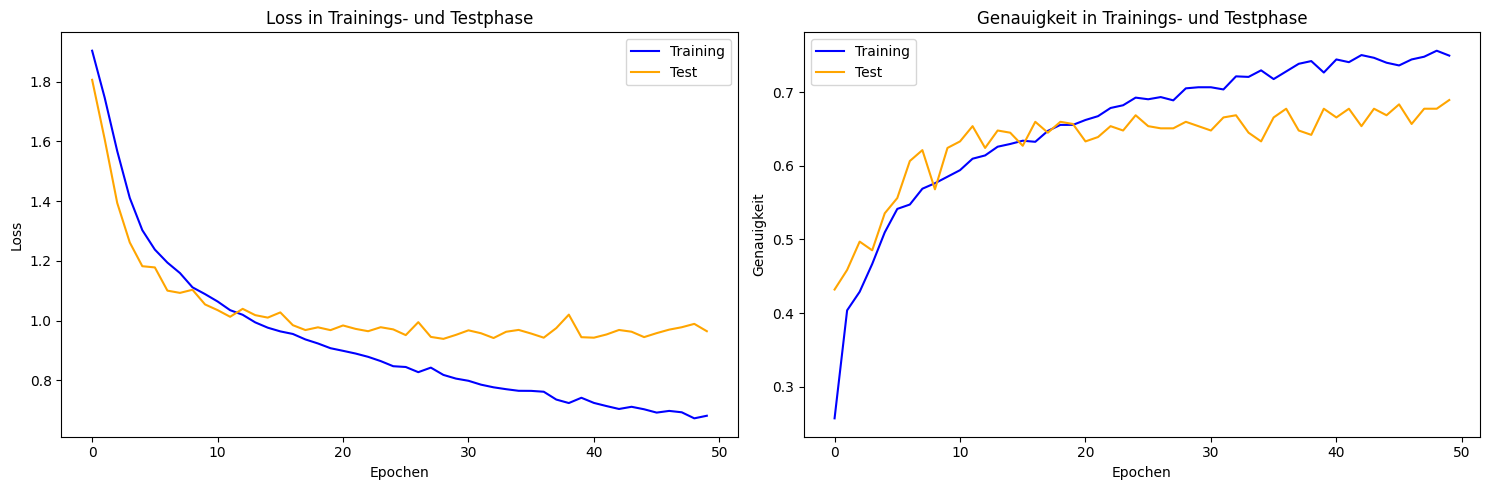

In [76]:
# Plot des Verlaufs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot Loss
ax1.plot(history.history['loss'], label='Training', color='blue')
ax1.plot(history.history['val_loss'], label='Test', color='orange')
ax1.set_xlabel('Epochen')
ax1.set_ylabel('Loss')
ax1.set_title('Loss in Trainings- und Testphase')
ax1.legend()

# Plot Genauigkeit
ax2.plot(history.history['accuracy'], label='Training', color='blue')
ax2.plot(history.history['val_accuracy'], label='Test', color='orange')
ax2.set_xlabel('Epochen')
ax2.set_ylabel('Genauigkeit')
ax2.set_title('Genauigkeit in Trainings- und Testphase')
ax2.legend()

plt.tight_layout()
plt.show()
